In [5]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0305.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0394.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0105.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0104.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0325.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0332.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0296.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0114.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0329.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0100.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0299.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0307.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0301.JPG
/kaggle/inpu

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
data_dir = '../input/rice-leaf-diseases/rice_leaf_diseases'

In [8]:
data_dir

'../input/rice-leaf-diseases/rice_leaf_diseases'

In [9]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('../input/rice-leaf-diseases/rice_leaf_diseases')

In [10]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [11]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

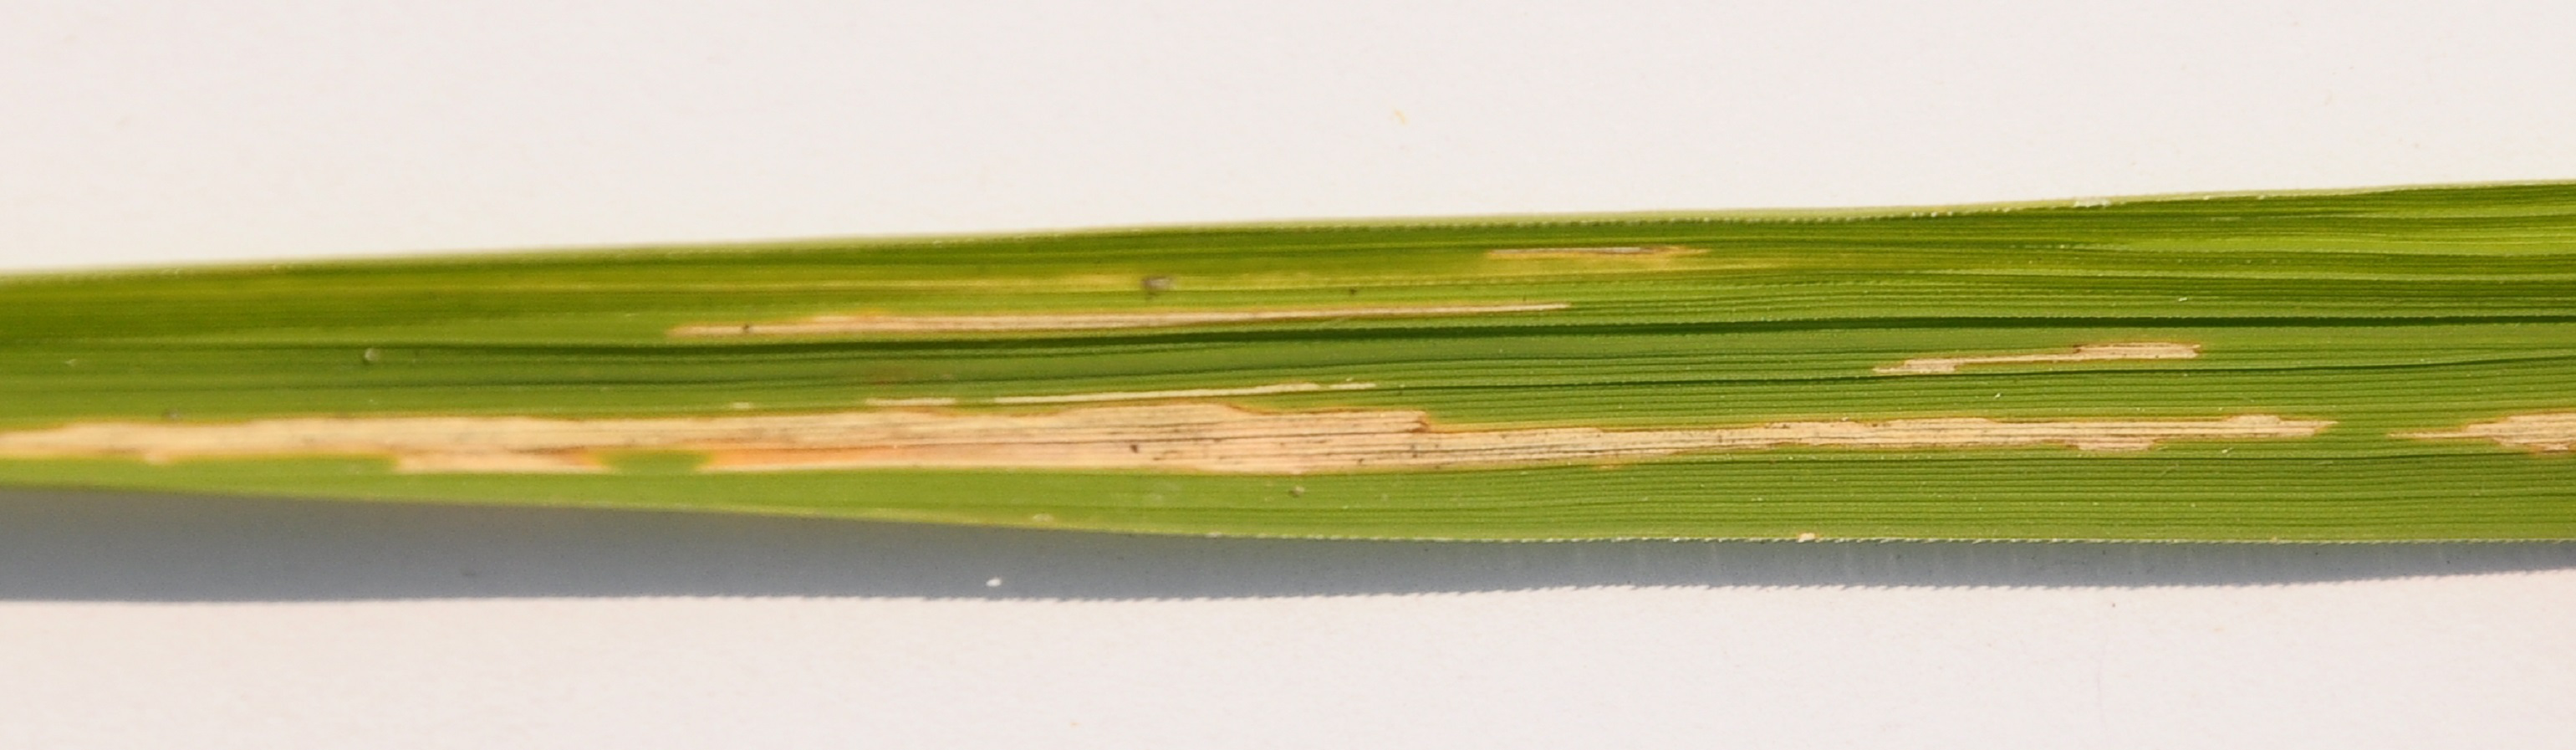

In [12]:
PIL.Image.open(str(bacteria[0]))

In [13]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [14]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [15]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}

In [16]:
str(dict["smut"][0])

'../input/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0330.jpg'

In [17]:
img=cv2.imread(str((dict["smut"][0])))
               


In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [20]:
y[:5]

[0, 0, 0, 0, 0]

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [23]:
len(X_test)

30

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
y_test[0]

1

In [31]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

In [34]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)    

Epoch 1/40
3/3 [==============================] - 2s 267ms/step - loss: 1.4654 - accuracy: 0.3667
Epoch 2/40
3/3 [==============================] - 1s 267ms/step - loss: 1.3442 - accuracy: 0.4556
Epoch 3/40
3/3 [==============================] - 1s 268ms/step - loss: 1.0478 - accuracy: 0.4556
Epoch 4/40
3/3 [==============================] - 1s 273ms/step - loss: 1.0403 - accuracy: 0.4111
Epoch 5/40
3/3 [==============================] - 1s 275ms/step - loss: 0.9943 - accuracy: 0.5333
Epoch 6/40
3/3 [==============================] - 1s 272ms/step - loss: 0.9592 - accuracy: 0.5667
Epoch 7/40
3/3 [==============================] - 1s 272ms/step - loss: 0.8992 - accuracy: 0.6111
Epoch 8/40
3/3 [==============================] - 1s 269ms/step - loss: 0.9365 - accuracy: 0.5444
Epoch 9/40
3/3 [==============================] - 1s 269ms/step - loss: 0.8695 - accuracy: 0.5444
Epoch 10/40
3/3 [==============================] - 1s 263ms/step - loss: 0.8101 - accuracy: 0.6556
Epoch 11/40
3/3 [==

In [35]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 216ms/step - loss: 0.6431 - accuracy: 0.7333


[0.6430774927139282, 0.7333333492279053]